# Project 14 -- SEYI OGUNMODEDE

**INSTRUCTOR:** Dr. Ward

- Help with figuring out how to write a function.   

## Question 1

In [1]:
import pandas as pd

In [2]:
products = pd.read_csv("/anvil/projects/tdm/data/icecream/products.csv")

In [3]:
 reviews = pd.read_csv("/anvil/projects/tdm/data/icecream/reviews.csv")

In [4]:
# Let us look at the sizes of the dataset
# 57 - rows with 7 - columns

products.shape

(57, 7)

In [5]:
# reviews is very large
# 21674 - rows with 13 - columns

reviews.shape

(21674, 13)

In [6]:
# To know the columns names for reviews
# They are wrapped inside a list and index there

reviews.columns

Index(['brand', 'key', 'author', 'date', 'stars', 'title', 'helpful_yes',
       'helpful_no', 'text', 'taste', 'ingredients', 'texture', 'likes'],
      dtype='object')

In [8]:
# To get up a column names themselves

reviews.columns.values

array(['brand', 'key', 'author', 'date', 'stars', 'title', 'helpful_yes',
       'helpful_no', 'text', 'taste', 'ingredients', 'texture', 'likes'],
      dtype=object)

In [9]:
# you can put it to a list if you want

list(reviews.columns.values)

['brand',
 'key',
 'author',
 'date',
 'stars',
 'title',
 'helpful_yes',
 'helpful_no',
 'text',
 'taste',
 'ingredients',
 'texture',
 'likes']

In [7]:
# To know the columns names for products

products.columns

Index(['key', 'name', 'subhead', 'description', 'rating', 'rating_count',
       'ingredients'],
      dtype='object')

In [11]:
list(products.columns.values)

['key',
 'name',
 'subhead',
 'description',
 'rating',
 'rating_count',
 'ingredients']

In [ ]:
# Notice that both DataFrames have a key column and an ingredient column in common

In [12]:
# Let us look at their heads

reviews.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients,texture,likes
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN


In [13]:
products.head()

,key,name,subhead,description,rating,rating_count,ingredients
0,0_bj,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,1_bj,Netflix & Chilll'd™,Peanut Butter Ice Cream with Sweet & Salty Pre...,There’s something for everyone to watch on Net...,4.0,127,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,2_bj,Chip Happens,A Cold Mess of Chocolate Ice Cream with Fudge ...,Sometimes “chip” happens and everything’s a me...,4.7,130,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
3,3_bj,Cannoli,Mascarpone Ice Cream with Fudge-Covered Pastry...,As a Limited Batch that captured the rapture o...,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,4_bj,Gimme S’more!™,Toasted Marshmallow Ice Cream with Chocolate C...,It’s a gimme: there’s always room for s’more. ...,4.5,281,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [ ]:
# indeed every products seem to have a unique key and does not seem to have a unique sets of ingredients
# The are lot of diferences in the ingredient, the key is the right thing to match on,
# if we have to merge the two DataFrames together.
# we want to match on common columns and not ones that has NAs in them.

In [14]:
# This is the merge DataFrame
# i will call my merged DataFrame, joinDF.
# i will merge the reviews and the products on the column called key

joinDF = pd.merge(reviews, products, on='key')

In [15]:
# Let us take a look at the new DataFrame (joinDF)
# it won't have quite as many rows as review, it only got 7943
# This is because there might be some keys there were not in the products dataframe 
# but were found in the reviews 

joinDF.shape

(7943, 19)

In [ ]:
# There are smaller number of rows in joinDF than in reviews
# likely, there are some key values in reviews that are not in products
# Also, joinDF has 19 columns; reviews has 13 columns and products has 7 columns
# So, we basically preserved all of the columns but did not duplicate the column called 'key'.

In [16]:
joinDF.head()

# if you look at the merged  DataFrame, it only has one column for key
# while for ingredient, it has 'ingredients_x' column which is for 'reviews' 
# and 'ingredients_y' column which is for 'products'

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients_x,texture,likes,name,subhead,description,rating,rating_count,ingredients_y
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."


In [17]:
# Another way to merge data frames
# first keeping all of the rows from reviews 

pd.merge(reviews, products, on='key').shape

(7943, 19)

In [18]:
# How did we actially did that? it is through inner join
# So it will keep track of therows that were containing the key in both DataFrames

pd.merge(reviews, products, on='key', how = 'inner').shape
# This is basically what I did before

(7943, 19)

In [22]:
# For instance if we decided to do left join
# It will give me one row for every rows in reviews
# It will respect the number of rows from the DataFrame on the left here "reviews"

revDF = pd.merge(reviews, products, on='key', how = 'left')

In [23]:
# It got the same number of rows as we did earlier

revDF.shape

# Here is another way to do it (but it preferable, to do the first way)

(21674, 19)

What are the column names for reviews.csv? What are the column names for products.csv?

What column do they have in common?

Go ahead and merge these two data frames based on the common column (do not merge on a column that has NaN), and save the results from the merge as a new dataframe.

Find a second way to merge the data frames.

## Question 2

In [24]:
# For this new DataFrame (joinDF) looking at the head

# For ingredient, it has 'ingredients_x' column which has all the contents from'reviews' 
# and 'ingredients_y' column which has all the contents from'products'

joinDF.head()

,brand,key,author,date,stars,title,helpful_yes,helpful_no,text,taste,ingredients_x,texture,likes,name,subhead,description,rating,rating_count,ingredients_y
0,bj,0_bj,Ilovebennjerry,2017-04-15,3,Not enough brownies!,10.0,3.0,"Super good, don't get me wrong. But I came for...",NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
1,bj,0_bj,Sweettooth909,2020-01-05,5,I’m OBSESSED with this pint!,3.0,0.0,I decided to try it out although I’m not a hug...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
2,bj,0_bj,LaTanga71,2018-04-26,3,My favorite...More Caramel Please,5.0,2.0,My caramel core begins to disappear about half...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
3,bj,0_bj,chicago220,2018-01-14,5,Obsessed!!!,24.0,1.0,Why are people complaining about the blonde br...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
4,bj,0_bj,Kassidyk,2020-07-24,1,Worst Ice Cream Ever!,1.0,5.0,This ice cream is worst ice cream I’ve ever ta...,NaN,NaN,NaN,NaN,Salted Caramel Core,Sweet Cream Ice Cream with Blonde Brownies & a...,Find your way to the ultimate ice cream experi...,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."


In [25]:
# What happens and why if you tried to merge the dataframes on the column ingredients?
# It gives an error

tryDF = pd.merge(reviews, products, on='ingredients')

ValueError: You are trying to merge on float64 and object columns. If you wish to proceed you should use pd.concat

In [ ]:
# What should we do instead, if we want to merge on ingredients?
# We have to adjust what is in the two columns
# We have to go look at what is in the ingredient column from the reviews dataframe
# what is in the ingredient column from the products dataframe
# And try to make them match

What do you notice about the column ingredients that was originally in the products dataframe? Why do you think this happened?

What happens and why if you tried to merge the dataframes on the column ingredients?

What should we do instead, if we want to merge on ingredients?

## Question 3

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import numpy as np
from wordcloud import STOPWORDS

In [27]:
import nltk
from nltk.probability import FreqDist

In [28]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [30]:
# This is for the first entry

products.ingredients[0]

'CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER), WATER, BROWN SUGAR, SUGAR, MILK, WHEAT FLOUR, EGG YOLKS, CORN SYRUP, EGGS, BUTTER (CREAM, SALT), BUTTEROIL, PECTIN, SEA SALT, SOYBEAN OIL, VANILLA EXTRACT, GUAR GUM, SOY LECITHIN, BAKING POWDER (SODIUM ACID PYROPHOSPHATE, SODIUM BICARBONATE, CORN STARCH, MONOCALCIUM PHOSPHATE), BAKING SODA, SALT, CARRAGEENAN, LACTASE'

In [31]:
# To ensure everythinh is in lower case

products.ingredients[0].lower()

'cream, skim milk, liquid sugar (sugar, water), water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter (cream, salt), butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder (sodium acid pyrophosphate, sodium bicarbonate, corn starch, monocalcium phosphate), baking soda, salt, carrageenan, lactase'

In [32]:
# After which , i will split
# Then we can do a bunch of different words.

products.ingredients[0].lower().split()

['cream,',
 'skim',
 'milk,',
 'liquid',
 'sugar',
 '(sugar,',
 'water),',
 'water,',
 'brown',
 'sugar,',
 'sugar,',
 'milk,',
 'wheat',
 'flour,',
 'egg',
 'yolks,',
 'corn',
 'syrup,',
 'eggs,',
 'butter',
 '(cream,',
 'salt),',
 'butteroil,',
 'pectin,',
 'sea',
 'salt,',
 'soybean',
 'oil,',
 'vanilla',
 'extract,',
 'guar',
 'gum,',
 'soy',
 'lecithin,',
 'baking',
 'powder',
 '(sodium',
 'acid',
 'pyrophosphate,',
 'sodium',
 'bicarbonate,',
 'corn',
 'starch,',
 'monocalcium',
 'phosphate),',
 'baking',
 'soda,',
 'salt,',
 'carrageenan,',
 'lactase']

In [34]:
# First save the list of the split words'products.ingredients[0].lower().split()' as mywords
# Then for all the word in 'mywords', if the word is not in 'STOPWORDS',
# I will take the list of all those words and call up 'myfilteredwords'
# Then i will join it back together with a space and it will be my 'onefilteredreview'

mywords = products.ingredients[0].lower().split()
myfilteredwords=[word for word in mywords if word not in STOPWORDS]
onefilteredreview=' '.join(myfilteredwords)  

In [35]:
onefilteredreview

'cream, skim milk, liquid sugar (sugar, water), water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter (cream, salt), butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder (sodium acid pyrophosphate, sodium bicarbonate, corn starch, monocalcium phosphate), baking soda, salt, carrageenan, lactase'

In [36]:
# I will make an empty list 
myfilteredreviews=[]

In [37]:
for myreview in  products.ingredients:
    mywords=myreview.lower().split()
    myfilteredwords=[word for word in mywords if word not in STOPWORDS]
    onefilteredreview=' '.join(myfilteredwords)
    myfilteredreviews.append(onefilteredreview)

In [38]:
# This is the first five of them

myfilteredreviews[0:5]

['cream, skim milk, liquid sugar (sugar, water), water, brown sugar, sugar, milk, wheat flour, egg yolks, corn syrup, eggs, butter (cream, salt), butteroil, pectin, sea salt, soybean oil, vanilla extract, guar gum, soy lecithin, baking powder (sodium acid pyrophosphate, sodium bicarbonate, corn starch, monocalcium phosphate), baking soda, salt, carrageenan, lactase',
 'cream, skim milk, liquid sugar (sugar, water), water, sugar, peanuts, wheat flour, canola oil, egg yolks, corn starch, peanut oil, cocoa powder, salt, soybean oil, invert cane sugar, milk fat, eggs, egg whites, guar gum, soy lecithin, tapioca starch, baking soda, carrageenan, vanilla extract, barley malt, malted barley flour',
 'cream, liquid sugar (sugar, water), skim milk, water, sugar, cocoa (processed alkali), potato, coconut oil, corn syrup solids, soybean oil, egg yolks, rice starch, sunflower oil, barley malt, cocoa powder, wheat flour, milk, salt, soy lecithin, yeast extract, natural flavor, guar gum, sea salt, m

In [39]:
# Now i want to join all of those together, into one very large string
# I call it 'myhugestring' 

myhugestring = ' '.join(myfilteredreviews)

In [51]:
# Then i want to make a wordcloud

wordcloud=WordCloud(width=800, height=800, background_color='pink', min_font_size=10).generate(myhugestring)

<function matplotlib.pyplot.show(close=None, block=None)>

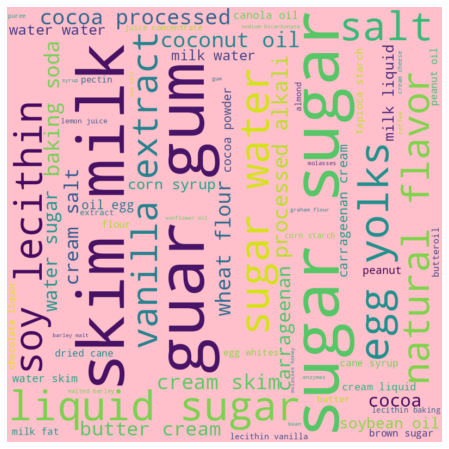

In [52]:
# Then i display it

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show

In [42]:
# since the word 'sugar' appears twice
# Then to eliminate, i will 

from collections import Counter

In [43]:
# Then look for the top 20 words there

mycounts=Counter(myhugestring.lower().split())

In [44]:
mycounts.most_common(20)

[('oil,', 106),
 ('milk,', 78),
 ('sugar,', 77),
 ('cocoa', 72),
 ('egg', 69),
 ('cream,', 62),
 ('sugar', 62),
 ('gum,', 61),
 ('salt,', 60),
 ('(sugar,', 58),
 ('guar', 58),
 ('skim', 57),
 ('liquid', 57),
 ('water),', 57),
 ('water,', 57),
 ('yolks,', 57),
 ('flour,', 52),
 ('soy', 51),
 ('natural', 49),
 ('vanilla', 48)]

Let’s create a word cloud with the ingredients in all of the Ben and Jerry icecream. Remove all the stop words. Afterwards, we want to focus on the words that appear most frequently.

## Question 4

In [45]:
# Load the image mask

icecream_mask = np.array(Image.open('/anvil/projects/tdm/data/icecream/icecream.png'))

In [ ]:
# Extract the text to use for the word cloud
# No need to run this because my text has been generated for me using 'myhugestring'

### text = " ".join(str(each) for each in df.columnname)

In [57]:
# Create a WordCloud object with the mask
wordcloud = WordCloud(max_words=200, colormap='Set1', background_color="orange", mask=icecream_mask).generate(myhugestring)


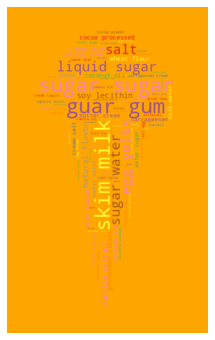

In [58]:
# Display the word cloud on top of the image
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(wordcloud, interpolation="bilinear")
ax.axis('off')

plt.show()

Now for the best part, let’s create a custom shape. The WordCloud function has an argument called mask that enables it to take maskable images and use them as the outline the word cloud we created. In the dataset there is an image named icecream.png. This image meets the requirement of having a background that is completely white (the color code is #ffffff). Go ahead and create the word cloud! What do you see?

## Question 5

In [ ]:
# code here

Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.